<h1>Accrual Persistence & Accrual Based Trading Strategy- Replicating Sloan (1996)</h1>

The main idea of this paper for this coding exercise, is that accruals make earnings less persistent, while cash flows represent persistent earnings. The original period was of 30 years from 1962 to 1991. 

The first step is to do descriptive analysis, where in mean values of accruals, cashflows and earnings of firms falling in each of the deciles based on their accruals are analyzed. 

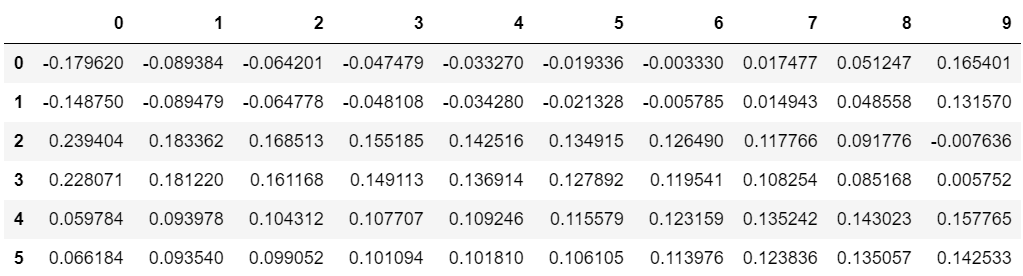

In [792]:
from IPython.display import Image
Image(filename = "C:/Users/anshu/OneDrive/Pictures/table1.png", width = 800, height=400)

In this image, first two rows represent accrual mean and median values for all deciles, next two rows represent cashflow mean and median and last two rows represent earnings mean and median values

Next step is to regress future earnings on present earnings and analyzing the coefficient. This process is done twice, first for all observations and next for each of the industries.

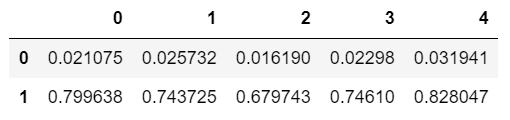

In [795]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/reg2.png", width = 600, height=300)

In the table above, row 0 represents the intercept and row 1 represents the slope of the regression, which is coefficient of earnings. Column 0 represents the result for pooled regression and columns 1, 2, 3, and 4 represent the mean, Q1, Median and Q3 values, across industries.

The third step involves regressing future earnings on accruals and cash flows of present time. This step also performs pooled and industry level regression.

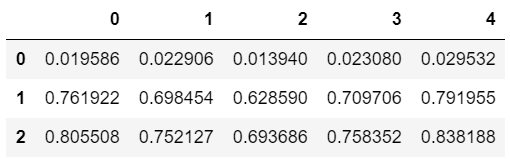

In [796]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/reg3.png", width = 600, height=300)

Here, row 0 represents the intercept, row 1 represents coefficient of accruals and row 2 represents coefficient of cashflows. Column 0 represents result of pooled regression while columns 1, 2, 3 and 4 represent Mean, Q1, Median and Q3 values for industry level regression.

The final step was to see the reversal in high versus low decile groups of these three measures, namely, earnings, accruals and cashflows.

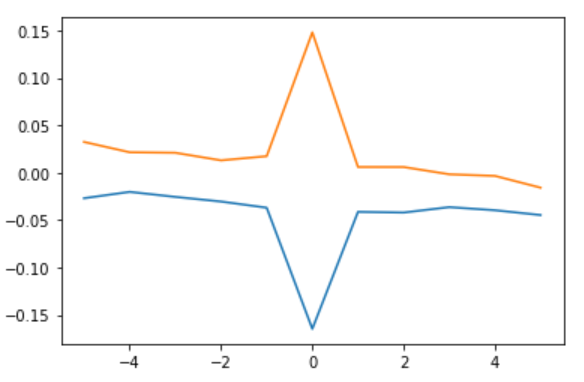

In [1025]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/acc_rev_orig.png", width = 300, height=300)
#Accrual Reversal

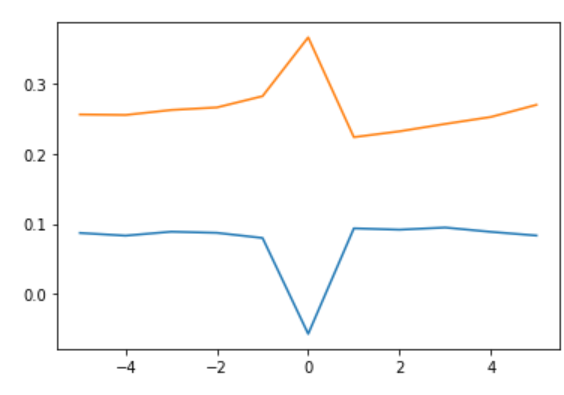

In [1026]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/cf_rev_orig.png", width = 300, height=300)
#Cash flow reversal

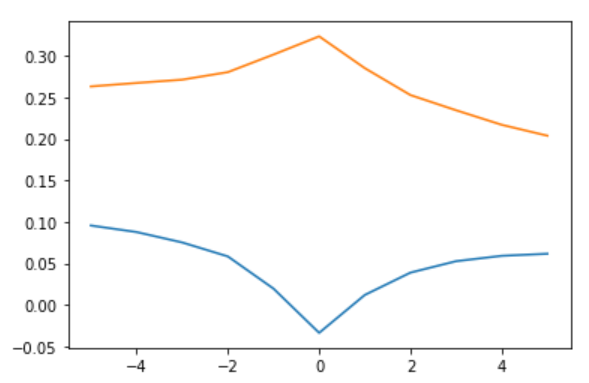

In [1027]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/earn_rev_orig.png", width = 300, height=300)
#Earnings reversal

Here, it is clear that accrual reversal is more rigorous than either of cashflow or earnings reversal. Hence, for the original period, the results were satisfactorily reproduced which also indicates that earnings originating from accruals are less persistent.

<h1> Extension Perios- 2010-2018</h1>

Following the same approach as in original period, table 1 was generated in the descriptive analysis step.

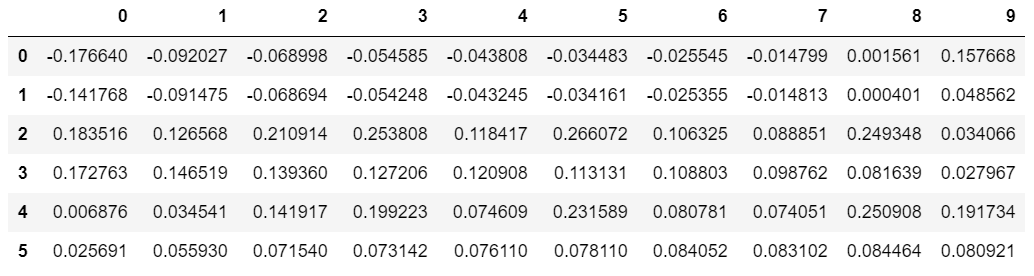

In [802]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/tabl1.png", width = 600, height=300)

This figure also indicates mean and median values for accruals for all decile groups, followed by mean and median values of cash flows and last by mean and median values of earnings.

Next step was regression of future earnings on present earnings.

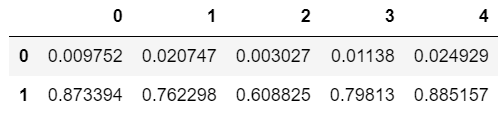

In [804]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/table2_ext.png", width = 400, height=100)

We do observe similar results here as the coefficient values are very similar to the original paper.

After this, future earnings are regressed on present accruals and cashflows.

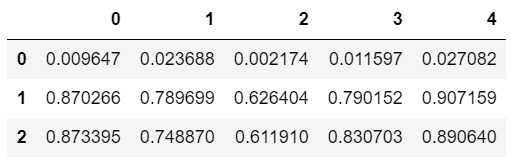

In [805]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/table3_ext.png", width = 400, height=100)

This the point when things start becoming problematic. In the dataset of extension period, the number of observations available is around 12,000 and the number of industries is 64. The total number of observations available for industry level regression is therefore very less, around 180.  This is not the ideal scenario and we see variation in relationship of coefficient of accrual and cashflow.

For the next step, we need 5 lag values and 5 future values for earnings, cashflow and accrual. If after merging these values with original set we discard observations with missing values then there is no observation left in the dataset. Therefore, some measure to handle missing values needs to be taken. Another option is to increase the time duration, like 2005-2018 to overcome the missing value problem. 

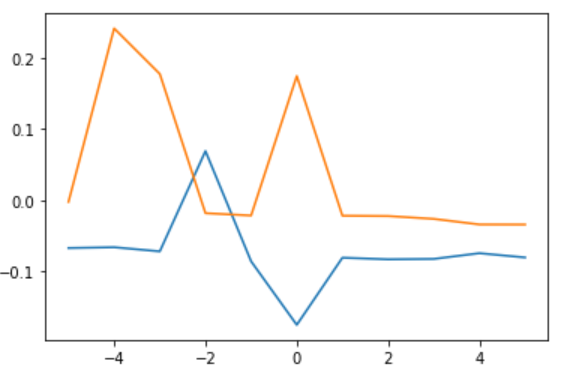

In [807]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/ac_rev_ext.png", width = 300, height=300)

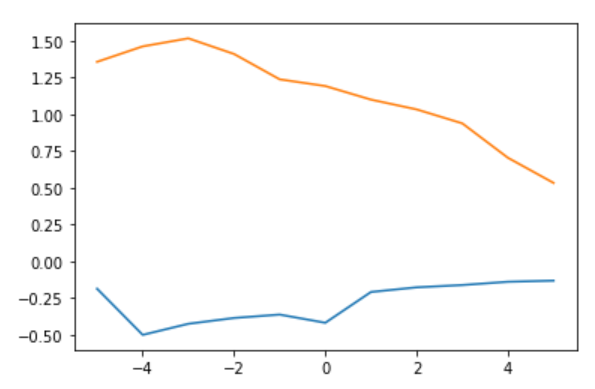

In [808]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/cf_rev_ext.png", width = 300, height=300)

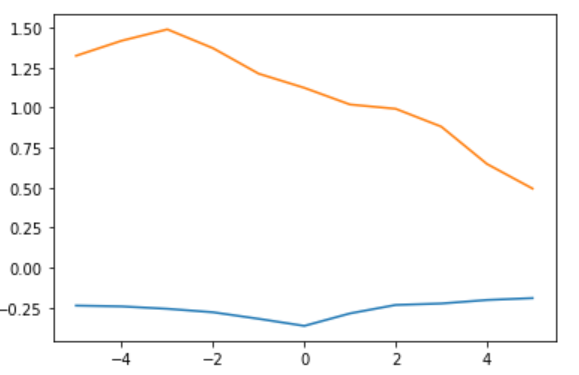

In [809]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/earn_rev_ext.png", width = 300, height=300)

We can clearly see the impact of simply ignoring observations with NaN values. 

A third attempt was made with bigger dataset by extending the time period from 2005 to 2018. 

The results for tables 1, 2 and 3 and Figure 1 are given below for this extended period.

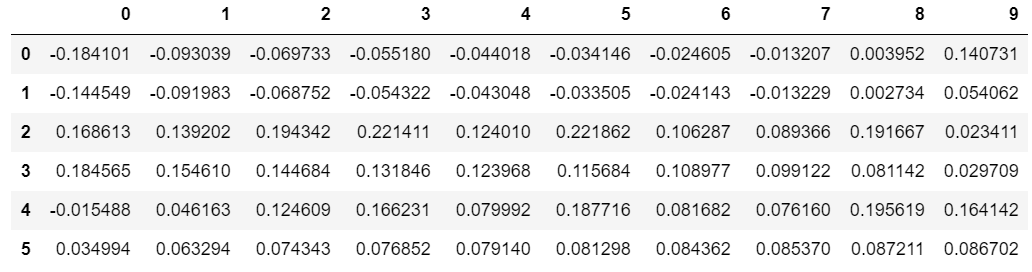

In [810]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/table1_new.png", width = 600, height=300)

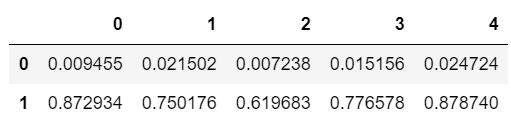

In [811]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/table2_new.png", width = 300, height=100)

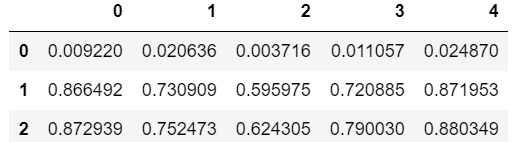

In [812]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/table3_new.png", width = 400, height=200)

We observe that by extending the time period, we are getting reslts consistent with the hypothesis of the paper. A reason for this is also that when dealing with lag variables in panel data, observations with missing value in any column for entire year are affected. Therefore, since we were dealing with 5 lag and 5 future value variables, atleast 11 years of time frame should be used or a mechanism for imputing missing values should be developed.

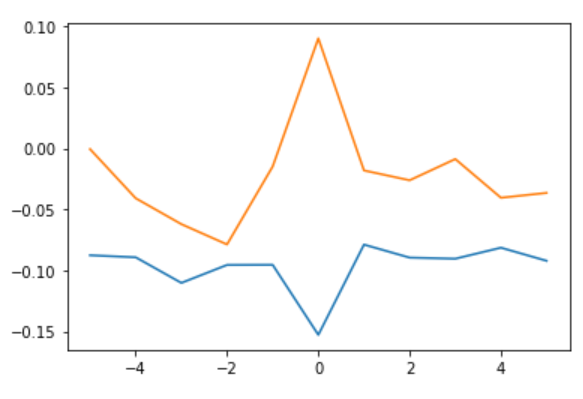

In [813]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/ac_rev_new.png", width = 400, height=200)

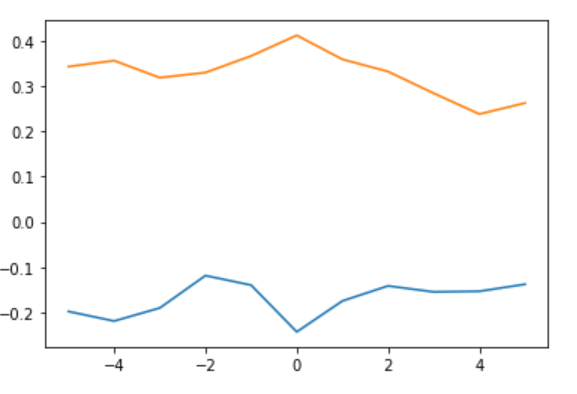

In [814]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/cf_rev_new.png", width = 400, height=200)

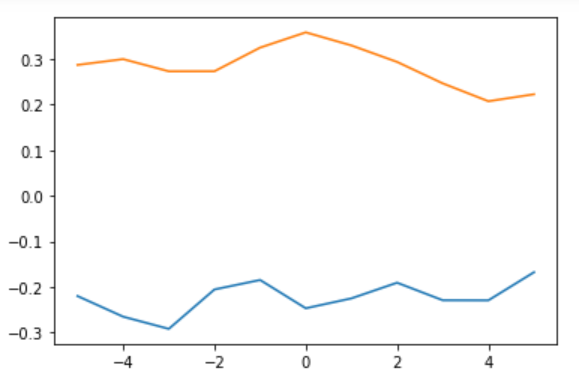

In [815]:
Image(filename = "C:/Users/anshu/OneDrive/Pictures/earn_rev_new.png", width = 400, height=200)

Now, we find that results of paper are consistent even in different time-period.

Note: For different time-periods, same notebook was used by changing the year in sql query.

<h1> Code </h1>

In [1]:
import pandas as pd
import wrds
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
import numpy as np
from scipy.stats.mstats import winsorize
from scipy import stats

In [3]:
conn = wrds.Connection(wrds_username='anuja63')

Enter your WRDS username [anshu]:anuja63
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [4]:
funda = conn.raw_sql("""
                      select gvkey, fyear, sich, AT, ACT, CHE, LCT, DLC, TXP, DP, OIADP
                      from compa.funda where
                       (consol='C' and indfmt='INDL' and datafmt='STD' and popsrc='D') and
                       fyear < 1993 and
                       fyear > 1960 and (exchg=11 or exchg = 12)
                      """) 

In [5]:
company = conn.raw_sql("""
                      select gvkey, sic
                      from compa.company
                     """)

In [847]:
funda1 = pd.merge(funda,company,on=['gvkey'])

In [848]:
funda1.describe(include="all")

,gvkey,fyear,sich,at,act,che,lct,dlc,txp,dp,oiadp,sic
count,71163,71163.000000,13448.000000,67462.000000,59633.000000,65827.000000,61084.000000,64706.000000,53097.000000,62719.000000,66882.000000,71163
unique,4819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420
top,008551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6020
freq,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2851
mean,NaN,1977.627194,4424.615184,1655.013784,312.916043,175.411184,225.298757,161.670458,22.721549,45.679516,104.944905,NaN
std,NaN,9.039604,1911.830343,8449.168572,1267.963407,1543.540107,1351.034092,1660.985460,133.679058,247.525234,470.571386,NaN
min,NaN,1961.000000,100.000000,0.000000,0.000000,-1.223000,0.000000,0.000000,-33.000000,-67.364000,-2278.301000,NaN
25%,NaN,1970.000000,2911.000000,33.893750,14.017000,1.708000,6.486750,0.570000,0.040000,0.829000,2.510000,NaN
50%,NaN,1978.000000,3950.000000,132.472000,48.276000,6.700000,23.460000,3.810500,1.021000,3.655000,11.697000,NaN
75%,NaN,1986.000000,6022.000000,635.427250,176.943000,32.400000,94.280500,22.146500,6.327000,17.269500,52.476500,NaN


In [849]:
funda1['sic1'] = np.where(funda1['sich']>0, funda1['sich'], funda1['sic'])

In [850]:
funda1 = funda1.drop(['sich','sic'],axis=1)

In [851]:
funda1['sic1'] = funda1['sic1'].astype(int)

In [852]:
funda1 = funda1.dropna()

In [853]:
funda1.shape

(48892, 11)

In [854]:
funda1.describe(include="all")

,gvkey,fyear,at,act,che,lct,dlc,txp,dp,oiadp,sic1
count,48892,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000
unique,3553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,011781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1978.994784,1034.379372,356.586486,65.254035,244.034782,53.822734,22.994079,51.552908,106.263381,3968.746523
std,NaN,7.625526,4108.744327,1363.617979,354.317004,1037.832591,280.087775,128.259947,256.093546,452.167002,1767.483631
min,NaN,1961.000000,0.000000,0.000000,-1.223000,0.000000,0.000000,-26.012000,0.000000,-2278.301000,100.000000
25%,NaN,1973.000000,34.892750,16.746750,1.764000,7.962250,0.671000,0.110000,1.058000,2.601750,2834.000000
50%,NaN,1979.000000,129.619000,57.652000,6.631500,28.843500,3.856000,1.210500,4.564500,11.969500,3640.000000
75%,NaN,1985.000000,549.058500,209.646500,28.393250,115.889250,19.493000,6.999250,21.475250,54.680500,4931.000000


In [855]:
funda1.dtypes

gvkey     object
fyear    float64
at       float64
act      float64
che      float64
lct      float64
dlc      float64
txp      float64
dp       float64
oiadp    float64
sic1       int32
dtype: object

In [856]:
funda1_lag1 = funda1[['gvkey','fyear','at','act','che','lct','dlc','txp']].copy() 

In [857]:
funda1_lag1['fyear'] = funda1_lag1['fyear'] + 1

In [858]:
funda1_lag1 = funda1_lag1.rename(columns={'at':'at_lag1','act':'act_lag1','che':'che_lag1','lct':'lct_lag1','dlc':'dlc_lag1','txp':'txp_lag1'})

In [859]:
funda1 = pd.merge(funda1,funda1_lag1, how='left', on=['gvkey','fyear'])

In [860]:
funda1 = funda1.dropna()

In [861]:
funda1.shape

(45105, 17)

In [862]:
funda1.describe(include="all")

,gvkey,fyear,at,act,che,lct,dlc,txp,dp,oiadp,sic1,at_lag1,act_lag1,che_lag1,lct_lag1,dlc_lag1,txp_lag1
count,45105,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000
unique,3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,008009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1979.419621,1081.520487,374.155856,68.324592,255.978371,56.014383,24.151786,53.982294,111.323537,3960.636493,1001.761181,347.281202,63.329557,234.768750,50.732401,22.966786
std,NaN,7.348160,4223.112638,1402.531925,364.296276,1069.028470,287.703379,132.402611,263.719358,464.320723,1758.581738,4015.240549,1312.924277,338.152020,989.930557,253.173136,129.343963
min,NaN,1962.000000,0.302000,0.000000,-1.223000,0.000000,0.000000,-26.012000,0.000000,-2278.301000,100.000000,0.186000,0.000000,-1.223000,0.000000,0.000000,-26.012000
25%,NaN,1974.000000,38.548000,18.762000,1.927000,8.796000,0.743000,0.125000,1.184000,2.896000,2834.000000,33.742000,16.356000,1.738000,7.725000,0.669000,0.130000
50%,NaN,1979.000000,139.597000,62.665000,7.200000,31.177000,4.120000,1.312000,5.022000,12.988000,3630.000000,125.262000,56.081000,6.466000,27.849000,3.783000,1.238000
75%,NaN,1986.000000,589.642000,223.114000,30.440000,125.050000,20.628000,7.552000,23.267000,58.948000,4931.000000,534.673000,203.487000,27.522000,111.815000,18.929000,7.069000


In [863]:
funda1['avg_at'] = (funda1['at']+funda1['at_lag1'])/2

In [864]:
funda1['chng_ca'] = funda1['act'] - funda1['act_lag1']

In [865]:
funda1['chng_cash'] = funda1['che'] - funda1['che_lag1']

In [866]:
funda1['chng_cl'] = funda1['lct'] - funda1['lct_lag1']

In [867]:
funda1['chng_std'] = funda1['dlc'] - funda1['dlc_lag1']

In [868]:
funda1['chng_txp'] = funda1['txp'] - funda1['txp_lag1']

In [869]:
funda1['earnings'] = funda1['oiadp']/funda1['avg_at']

In [870]:
funda1['acrl'] = (funda1['chng_ca'] - funda1['chng_cash'] - funda1['chng_cl'] + funda1['chng_std'] + funda1['chng_txp'] - funda1['dp'])/funda1['avg_at']

In [871]:
funda1['cfo'] = funda1['earnings'] - funda1['acrl']

In [872]:
funda2 = funda1[['gvkey','fyear','earnings','acrl','cfo','sic1']].copy()

In [873]:
funda2 = funda2.dropna()

In [874]:
funda2.describe()

,fyear,earnings,acrl,cfo,sic1
count,45105.000000,45105.000000,45105.000000,45105.000000,45105.000000
mean,1979.419621,0.114969,-0.020264,0.135233,3960.636493
std,7.348160,0.142815,0.106632,0.160847,1758.581738
min,1962.000000,-5.891667,-2.751900,-6.553617,100.000000
25%,1974.000000,0.063751,-0.065496,0.077387,2834.000000
50%,1979.000000,0.107961,-0.027184,0.134313,3630.000000
75%,1986.000000,0.162844,0.017689,0.195297,4931.000000
max,1992.000000,5.305521,6.216008,6.563128,9997.000000


In [875]:
fundaclean2 = pd.DataFrame()

In [876]:
yearlist=funda2.fyear.unique().astype(int).tolist()
yearlist.sort()

In [877]:
for year in yearlist:
    fundacleantmp = funda2[funda2['fyear'] == year]
    fundacleantmp['acrl_dec'] = pd.qcut(fundacleantmp['acrl'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
    fundacleantmp['earn_dec'] = pd.qcut(fundacleantmp['earnings'], 10, labels = [1,2,3,4,5,6,7,8,9,10])
    fundacleantmp['cf_dec'] = pd.qcut(fundacleantmp['cfo'], 10, labels = [1,2,3,4,5,6,7,8,9,10])
    fundaclean2 = fundaclean2.append(fundacleantmp)

C:\Users\anshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\anshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [878]:
fundaclean2

,gvkey,fyear,earnings,acrl,cfo,sic1,acrl_dec,earn_dec,cf_dec
339,001081,1962.0,0.159911,-0.042712,0.202623,2621,5,9,9
4612,002137,1962.0,0.089485,-0.046481,0.135966,4813,4,7,7
5625,002408,1962.0,0.083581,-0.039544,0.123125,4812,5,6,6
6190,002526,1962.0,0.135120,0.164137,-0.029016,3690,10,9,1
6792,002661,1962.0,0.423216,-0.017213,0.440430,1040,8,10,10
...,...,...,...,...,...,...,...,...,...
48864,100598,1992.0,0.084014,-0.036017,0.120030,4210,6,5,5
48867,100465,1992.0,0.154756,-0.061042,0.215798,1220,4,9,9
48869,100709,1992.0,0.065249,-0.126577,0.191826,7380,1,4,8
48872,101317,1992.0,0.147178,-0.038495,0.185673,3842,6,9,8


In [879]:
accrual_mean = fundaclean2.groupby(['acrl_dec'])['acrl'].mean()
accrual_median = fundaclean2.groupby(['acrl_dec'])['acrl'].median()

In [880]:
earn_mean = fundaclean2.groupby(['acrl_dec'])['earnings'].mean()
earn_median = fundaclean2.groupby(['acrl_dec'])['earnings'].median()

In [881]:
cf_mean = fundaclean2.groupby(['acrl_dec'])['cfo'].mean()
cf_median = fundaclean2.groupby(['acrl_dec'])['cfo'].median()

In [882]:
table1 = pd.DataFrame(list(zip(accrual_mean, accrual_median, cf_mean, cf_median,earn_mean, earn_median)))

In [883]:
table1 = table1.transpose()

In [884]:
table1

,0,1,2,3,4,5,6,7,8,9
0,-0.179620,-0.089384,-0.064201,-0.047479,-0.033270,-0.019336,-0.003330,0.017477,0.051247,0.165401
1,-0.148750,-0.089479,-0.064778,-0.048108,-0.034280,-0.021328,-0.005785,0.014943,0.048558,0.131570
2,0.239404,0.183362,0.168513,0.155185,0.142516,0.134915,0.126490,0.117766,0.091776,-0.007636
3,0.228071,0.181220,0.161168,0.149113,0.136914,0.127892,0.119541,0.108254,0.085168,0.005752
4,0.059784,0.093978,0.104312,0.107707,0.109246,0.115579,0.123159,0.135242,0.143023,0.157765
5,0.066184,0.093540,0.099052,0.101094,0.101810,0.106105,0.113976,0.123836,0.135057,0.142533


In [885]:
#Pooled Regression - Future Earnings on Current Earnings

In [886]:
funda2_pr = fundaclean2[['gvkey','fyear','earnings']].copy()

In [887]:
funda2_pr['fyear'] = funda2_pr['fyear'] - 1

In [888]:
funda2_pr.head()

,gvkey,fyear,earnings
339,001081,1961.0,0.159911
4612,002137,1961.0,0.089485
5625,002408,1961.0,0.083581
6190,002526,1961.0,0.135120
6792,002661,1961.0,0.423216


In [889]:
funda2_pr = funda2_pr.rename(columns={'earnings':'earnings_lead1'})

In [890]:
pooled_reg = fundaclean2.copy()

In [891]:
pooled_reg.head(15)

,gvkey,fyear,earnings,acrl,cfo,sic1,acrl_dec,earn_dec,cf_dec
339,001081,1962.0,0.159911,-0.042712,0.202623,2621,5,9,9
4612,002137,1962.0,0.089485,-0.046481,0.135966,4813,4,7,7
5625,002408,1962.0,0.083581,-0.039544,0.123125,4812,5,6,6
6190,002526,1962.0,0.135120,0.164137,-0.029016,3690,10,9,1
6792,002661,1962.0,0.423216,-0.017213,0.440430,1040,8,10,10
6836,002695,1962.0,0.075510,-0.054778,0.130288,1311,3,6,7
6906,002689,1962.0,0.080947,-0.031201,0.112148,5900,6,6,6
9278,003235,1962.0,0.148543,-0.109232,0.257774,1000,1,9,9
12310,004022,1962.0,0.092287,-0.080516,0.172804,1311,2,7,8
12355,004034,1962.0,0.105171,-0.043320,0.148490,2621,4,8,8


In [892]:
pooled_reg = pd.merge(pooled_reg,funda2_pr,how='left', on=['gvkey','fyear'])

In [893]:
pooled_reg.head(13)

,gvkey,fyear,earnings,acrl,cfo,sic1,acrl_dec,earn_dec,cf_dec,earnings_lead1
0,001081,1962.0,0.159911,-0.042712,0.202623,2621,5,9,9,0.154401
1,002137,1962.0,0.089485,-0.046481,0.135966,4813,4,7,7,0.086095
2,002408,1962.0,0.083581,-0.039544,0.123125,4812,5,6,6,0.087366
3,002526,1962.0,0.135120,0.164137,-0.029016,3690,10,9,1,0.214744
4,002661,1962.0,0.423216,-0.017213,0.440430,1040,8,10,10,0.433278
5,002695,1962.0,0.075510,-0.054778,0.130288,1311,3,6,7,0.090653
6,002689,1962.0,0.080947,-0.031201,0.112148,5900,6,6,6,0.094715
7,003235,1962.0,0.148543,-0.109232,0.257774,1000,1,9,9,0.175037
8,004022,1962.0,0.092287,-0.080516,0.172804,1311,2,7,8,0.117311
9,004034,1962.0,0.105171,-0.043320,0.148490,2621,4,8,8,0.099605


In [894]:
pooled_reg = pooled_reg.dropna()

In [895]:
pooled_reg.describe()

,fyear,earnings,acrl,cfo,sic1,earnings_lead1
count,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000
mean,1978.848254,0.117342,-0.018344,0.135686,3955.074418,0.114905
std,7.084087,0.143042,0.106071,0.161869,1751.604695,0.137705
min,1962.000000,-5.891667,-2.751900,-6.553617,100.000000,-3.480869
25%,1973.000000,0.065780,-0.064070,0.077829,2834.000000,0.064085
50%,1978.000000,0.109498,-0.026219,0.134798,3630.000000,0.107965
75%,1985.000000,0.164645,0.019003,0.195753,4931.000000,0.161927
max,1991.000000,5.305521,6.216008,6.563128,9997.000000,5.305521


In [896]:
pr1_X = pooled_reg['earnings']

In [897]:
pr1_Y = pooled_reg['earnings_lead1']

In [898]:
from sklearn import linear_model

In [899]:
regr = linear_model.LinearRegression(fit_intercept=True)

In [900]:
pr1_X = pr1_X.to_numpy()

In [901]:
pr1_Y = pr1_Y.to_numpy()

In [902]:
pr1_X = pr1_X.reshape(-1,1)

In [903]:
pr1_Y = pr1_Y.reshape(-1,1)

In [904]:
regr.fit(pr1_X,pr1_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [905]:
regr.coef_, regr.intercept_

(array([[0.79963824]]), array([0.02107472]))

In [906]:
pooled_reg.describe(include="all")

,gvkey,fyear,earnings,acrl,cfo,sic1,acrl_dec,earn_dec,cf_dec,earnings_lead1
count,41576,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000,41576.0,41576.0,41576.0,41576.000000
unique,3238,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,NaN
top,009530,NaN,NaN,NaN,NaN,NaN,5.0,10.0,8.0,NaN
freq,30,NaN,NaN,NaN,NaN,NaN,4198.0,4228.0,4184.0,NaN
mean,NaN,1978.848254,0.117342,-0.018344,0.135686,3955.074418,NaN,NaN,NaN,0.114905
std,NaN,7.084087,0.143042,0.106071,0.161869,1751.604695,NaN,NaN,NaN,0.137705
min,NaN,1962.000000,-5.891667,-2.751900,-6.553617,100.000000,NaN,NaN,NaN,-3.480869
25%,NaN,1973.000000,0.065780,-0.064070,0.077829,2834.000000,NaN,NaN,NaN,0.064085
50%,NaN,1978.000000,0.109498,-0.026219,0.134798,3630.000000,NaN,NaN,NaN,0.107965
75%,NaN,1985.000000,0.164645,0.019003,0.195753,4931.000000,NaN,NaN,NaN,0.161927


In [907]:
pooled_reg['sic_ind'] = pooled_reg['sic1'].astype(str)

In [908]:
pooled_reg.dtypes

gvkey               object
fyear              float64
earnings           float64
acrl               float64
cfo                float64
sic1                 int32
acrl_dec          category
earn_dec          category
cf_dec            category
earnings_lead1     float64
sic_ind             object
dtype: object

In [909]:
pooled_reg = pooled_reg.dropna()

In [910]:
pooled_reg.head(14)

,gvkey,fyear,earnings,acrl,cfo,sic1,acrl_dec,earn_dec,cf_dec,earnings_lead1,sic_ind
0,001081,1962.0,0.159911,-0.042712,0.202623,2621,5,9,9,0.154401,2621
1,002137,1962.0,0.089485,-0.046481,0.135966,4813,4,7,7,0.086095,4813
2,002408,1962.0,0.083581,-0.039544,0.123125,4812,5,6,6,0.087366,4812
3,002526,1962.0,0.135120,0.164137,-0.029016,3690,10,9,1,0.214744,3690
4,002661,1962.0,0.423216,-0.017213,0.440430,1040,8,10,10,0.433278,1040
5,002695,1962.0,0.075510,-0.054778,0.130288,1311,3,6,7,0.090653,1311
6,002689,1962.0,0.080947,-0.031201,0.112148,5900,6,6,6,0.094715,5900
7,003235,1962.0,0.148543,-0.109232,0.257774,1000,1,9,9,0.175037,1000
8,004022,1962.0,0.092287,-0.080516,0.172804,1311,2,7,8,0.117311,1311
9,004034,1962.0,0.105171,-0.043320,0.148490,2621,4,8,8,0.099605,2621


In [911]:
pooled_reg["sic_ind2"] = ""

In [912]:
pooled_reg['sic_ind2'] = pooled_reg['sic_ind'].str.slice(0,2)

In [913]:
pooled_reg['sic_ind2'].unique()

array(['26', '48', '36', '10', '13', '59', '37', '33', '29', '49', '67',
       '51', '28', '50', '40', '20', '22', '54', '44', '78', '35', '73',
       '42', '34', '30', '15', '53', '62', '58', '65', '27', '99', '39',
       '38', '23', '25', '57', '32', '52', '72', '45', '75', '24', '63',
       '31', '61', '87', '21', '79', '70', '56', '14', '16', '17', '80',
       '82', '47', '64', '12', '55', '41', '60', '76', '46'], dtype=object)

In [914]:
pooled_reg.describe(include="all")

,gvkey,fyear,earnings,acrl,cfo,sic1,acrl_dec,earn_dec,cf_dec,earnings_lead1,sic_ind,sic_ind2
count,41576,41576.000000,41576.000000,41576.000000,41576.000000,41576.000000,41576.0,41576.0,41576.0,41576.000000,41576,41576
unique,3238,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,NaN,413,64
top,009530,NaN,NaN,NaN,NaN,NaN,5.0,10.0,8.0,NaN,1311,35
freq,30,NaN,NaN,NaN,NaN,NaN,4198.0,4228.0,4184.0,NaN,1886,3079
mean,NaN,1978.848254,0.117342,-0.018344,0.135686,3955.074418,NaN,NaN,NaN,0.114905,NaN,NaN
std,NaN,7.084087,0.143042,0.106071,0.161869,1751.604695,NaN,NaN,NaN,0.137705,NaN,NaN
min,NaN,1962.000000,-5.891667,-2.751900,-6.553617,100.000000,NaN,NaN,NaN,-3.480869,NaN,NaN
25%,NaN,1973.000000,0.065780,-0.064070,0.077829,2834.000000,NaN,NaN,NaN,0.064085,NaN,NaN
50%,NaN,1978.000000,0.109498,-0.026219,0.134798,3630.000000,NaN,NaN,NaN,0.107965,NaN,NaN
75%,NaN,1985.000000,0.164645,0.019003,0.195753,4931.000000,NaN,NaN,NaN,0.161927,NaN,NaN


In [915]:
industries = pooled_reg['sic_ind2'].unique()

In [916]:
len(industries)

64

In [917]:
pooled_reg.head(15)

,gvkey,fyear,earnings,acrl,cfo,sic1,acrl_dec,earn_dec,cf_dec,earnings_lead1,sic_ind,sic_ind2
0,001081,1962.0,0.159911,-0.042712,0.202623,2621,5,9,9,0.154401,2621,26
1,002137,1962.0,0.089485,-0.046481,0.135966,4813,4,7,7,0.086095,4813,48
2,002408,1962.0,0.083581,-0.039544,0.123125,4812,5,6,6,0.087366,4812,48
3,002526,1962.0,0.135120,0.164137,-0.029016,3690,10,9,1,0.214744,3690,36
4,002661,1962.0,0.423216,-0.017213,0.440430,1040,8,10,10,0.433278,1040,10
5,002695,1962.0,0.075510,-0.054778,0.130288,1311,3,6,7,0.090653,1311,13
6,002689,1962.0,0.080947,-0.031201,0.112148,5900,6,6,6,0.094715,5900,59
7,003235,1962.0,0.148543,-0.109232,0.257774,1000,1,9,9,0.175037,1000,10
8,004022,1962.0,0.092287,-0.080516,0.172804,1311,2,7,8,0.117311,1311,13
9,004034,1962.0,0.105171,-0.043320,0.148490,2621,4,8,8,0.099605,2621,26


In [918]:
alphas = []
intercepts = []

In [919]:
for i in industries:
    df = pooled_reg[pooled_reg['sic_ind2'] == i]
    df_X = df['earnings']
    df_Y = df['earnings_lead1']
    df_X = df_X.to_numpy()
    df_X = df_X.reshape(-1,1)
    df_Y = df_Y.to_numpy()
    df_Y = df_Y.reshape(-1,1)
    model = linear_model.LinearRegression(fit_intercept=True)
    model.fit(df_X,df_Y)
    alphas.append(model.coef_)
    intercepts.append(model.intercept_)

In [920]:
import statistics

In [921]:
reg1_alphas = np.quantile(alphas,[0.25,0.75])

In [922]:
reg1_alphas

array([0.67974338, 0.82804679])

In [923]:
reg1_alphas = np.insert(reg1_alphas,0,sum(alphas)/len(alphas))

In [924]:
reg1_alphas = np.insert(reg1_alphas,2,statistics.median(alphas))

In [925]:
reg1_alphas

array([0.74372457, 0.67974338, 0.74610021, 0.82804679])

In [926]:
reg1_intercepts = np.quantile(intercepts,[0.25,0.75])

In [927]:
reg1_intercepts = np.insert(reg1_intercepts,0,sum(intercepts)/len(intercepts))

In [928]:
reg1_intercepts = np.insert(reg1_intercepts,2,statistics.median(intercepts))

In [929]:
reg1_intercepts

array([0.02573158, 0.01619021, 0.02298005, 0.03194105])

In [931]:
reg1_alphas = np.insert(reg1_alphas,0,regr.coef_)

In [932]:
reg1_intercepts = np.insert(reg1_intercepts,0,regr.intercept_)

In [933]:
table2 = pd.DataFrame(list(zip(reg1_intercepts,reg1_alphas)))

In [934]:
table2 = table2.transpose()

In [935]:
table2

,0,1,2,3,4
0,0.021075,0.025732,0.016190,0.02298,0.031941
1,0.799638,0.743725,0.679743,0.74610,0.828047


In [936]:
pooled_reg.head()

,gvkey,fyear,earnings,acrl,cfo,sic1,acrl_dec,earn_dec,cf_dec,earnings_lead1,sic_ind,sic_ind2
0,001081,1962.0,0.159911,-0.042712,0.202623,2621,5,9,9,0.154401,2621,26
1,002137,1962.0,0.089485,-0.046481,0.135966,4813,4,7,7,0.086095,4813,48
2,002408,1962.0,0.083581,-0.039544,0.123125,4812,5,6,6,0.087366,4812,48
3,002526,1962.0,0.135120,0.164137,-0.029016,3690,10,9,1,0.214744,3690,36
4,002661,1962.0,0.423216,-0.017213,0.440430,1040,8,10,10,0.433278,1040,10


In [937]:
pr2_X = pooled_reg.iloc[:,3:5]

In [938]:
pr2_X.head()

,acrl,cfo
0,-0.042712,0.202623
1,-0.046481,0.135966
2,-0.039544,0.123125
3,0.164137,-0.029016
4,-0.017213,0.440430


In [939]:
pr2_Y = pooled_reg['earnings_lead1']

In [940]:
pr2_Y.head()

0    0.154401
1    0.086095
2    0.087366
3    0.214744
4    0.433278
Name: earnings_lead1, dtype: float64

In [941]:
model2 = linear_model.LinearRegression(fit_intercept=True)

In [942]:
model2.fit(pr2_X,pr2_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [943]:
model2.coef_,model2.intercept_

(array([0.76192171, 0.80550767]), 0.019586431482099917)

In [944]:
alphas2 = []
intercepts2 = []

In [945]:
for i in industries:
    df = pooled_reg[pooled_reg['sic_ind2'] == i]
    df_X = df.iloc[:,3:5]
    df_Y = df['earnings_lead1']
    model = linear_model.LinearRegression(fit_intercept=True)
    model.fit(df_X,df_Y)
    alphas2.append(model.coef_)
    intercepts2.append(model.intercept_)

In [946]:
coef_matrix = np.matrix(alphas2)

In [947]:
coef_matrix[:,0]

matrix([[ 0.71127932],
        [ 0.65166233],
        [ 0.55739637],
        [ 0.79298516],
        [ 0.61975248],
        [ 0.86727065],
        [ 0.58613959],
        [ 0.63411713],
        [ 0.62880068],
        [ 0.56656162],
        [ 2.12621097],
        [ 0.76970972],
        [ 0.62795754],
        [ 0.78311418],
        [ 0.87774462],
        [ 0.67620591],
        [ 0.5806363 ],
        [ 0.76831306],
        [ 0.54386919],
        [ 0.80066898],
        [ 0.64553767],
        [ 0.61826074],
        [ 0.7734934 ],
        [ 0.8180017 ],
        [ 0.71269042],
        [ 0.71182246],
        [ 0.85131065],
        [ 0.88107519],
        [ 0.87570648],
        [ 0.61386876],
        [ 0.75036201],
        [ 0.69697342],
        [ 0.44644131],
        [ 0.69670333],
        [ 0.6895589 ],
        [ 0.70813287],
        [ 0.65503213],
        [ 0.66845887],
        [ 0.88253798],
        [ 0.74432617],
        [ 0.80132211],
        [ 0.75995242],
        [ 0.57904626],
        [ 0

In [948]:
reg2_b1 = np.quantile(coef_matrix[:,0],[0.25,0.75])

In [949]:
reg2_b1 = np.insert(reg2_b1,0,sum(coef_matrix[:,0])/len(coef_matrix))

In [950]:
reg2_b1 = np.insert(reg2_b1,2,statistics.median(coef_matrix[:,0]))

In [951]:
reg2_b1 = np.insert(reg2_b1,0,model2.coef_[0])

In [952]:
reg2_b1

array([0.76192171, 0.6984541 , 0.62858989, 0.7097061 , 0.79195457])

In [953]:
reg2_b2 = np.quantile(coef_matrix[:,1],[0.25,0.75])

In [954]:
reg2_b2 = np.insert(reg2_b2,0, sum(coef_matrix[:,1])/len(coef_matrix))

In [955]:
reg2_b2 = np.insert(reg2_b2,2,statistics.median(coef_matrix[:,1]))

In [956]:
reg2_b2 = np.insert(reg2_b2,0,model2.coef_[1])

In [957]:
reg2_intercept = np.quantile(intercepts2,[0.25,0.75])

In [958]:
reg2_intercept = np.insert(reg2_intercept,0,sum(intercepts2)/len(intercepts2))

In [959]:
reg2_intercept = np.insert(reg2_intercept,2,statistics.median(intercepts2))

In [960]:
reg2_intercept = np.insert(reg2_intercept,0,model2.intercept_)

In [961]:
reg2_intercept

array([0.01958643, 0.02290598, 0.01394032, 0.02307962, 0.02953171])

In [962]:
table3 = pd.DataFrame(list(zip(reg2_intercept,reg2_b1,reg2_b2)))

In [963]:
table3 = table3.transpose()

In [964]:
table3

,0,1,2,3,4
0,0.019586,0.022906,0.013940,0.023080,0.029532
1,0.761922,0.698454,0.628590,0.709706,0.791955
2,0.805508,0.752127,0.693686,0.758352,0.838188


In [965]:
pooled_reg.head()

,gvkey,fyear,earnings,acrl,cfo,sic1,acrl_dec,earn_dec,cf_dec,earnings_lead1,sic_ind,sic_ind2
0,001081,1962.0,0.159911,-0.042712,0.202623,2621,5,9,9,0.154401,2621,26
1,002137,1962.0,0.089485,-0.046481,0.135966,4813,4,7,7,0.086095,4813,48
2,002408,1962.0,0.083581,-0.039544,0.123125,4812,5,6,6,0.087366,4812,48
3,002526,1962.0,0.135120,0.164137,-0.029016,3690,10,9,1,0.214744,3690,36
4,002661,1962.0,0.423216,-0.017213,0.440430,1040,8,10,10,0.433278,1040,10


In [966]:
lag1 = pooled_reg[['gvkey','fyear','earnings','acrl','cfo']].copy()

In [967]:
lag1.shape

(41576, 5)

In [968]:
lag1['fyear'] = lag1['fyear'] + 1
lag1 = lag1.rename(columns={'acrl':'acrl_lag1','cfo':'cfo_lag1','earnings':'earn_lag1'})

In [969]:
lag2 = pooled_reg[['gvkey','fyear','earnings','acrl','cfo']].copy()
lag2['fyear'] = lag2['fyear'] + 2
lag2 = lag2.rename(columns={'acrl':'acrl_lag2','cfo':'cfo_lag2','earnings':'earn_lag2'})

In [970]:
lag3 = pooled_reg[['gvkey','fyear','earnings','acrl','cfo']].copy()
lag3['fyear'] = lag3['fyear'] + 3
lag3 = lag3.rename(columns={'acrl':'acrl_lag3','cfo':'cfo_lag3','earnings':'earn_lag3'})

In [971]:
lag4 = pooled_reg[['gvkey','fyear','earnings','acrl','cfo']].copy()
lag4['fyear'] = lag4['fyear'] + 4
lag4 = lag4.rename(columns={'acrl':'acrl_lag4','cfo':'cfo_lag4','earnings':'earn_lag4'})

In [972]:
lag5 = pooled_reg[['gvkey','fyear','earnings','acrl','cfo']].copy()
lag5['fyear'] = lag5['fyear'] + 5
lag5 = lag5.rename(columns={'acrl':'acrl_lag5','cfo':'cfo_lag5','earnings':'earn_lag5'})

In [973]:
lead1 = pooled_reg[['gvkey','fyear','acrl','cfo']].copy()
lead1['fyear'] = lead1['fyear'] - 1
lead1 = lead1.rename(columns={'acrl':'acrl_lead1','cfo':'cfo_lead1'})

In [974]:
lead2 = pooled_reg[['gvkey','fyear','earnings','acrl','cfo']].copy()
lead2['fyear'] = lead2['fyear'] - 2
lead2 = lead2.rename(columns={'acrl':'acrl_lead2','cfo':'cfo_lead2','earnings':'earnings_lead2'})

In [975]:
lead3 = pooled_reg[['gvkey','fyear','earnings','acrl','cfo']].copy()
lead3['fyear'] = lead3['fyear'] - 3
lead3 = lead3.rename(columns={'acrl':'acrl_lead3','cfo':'cfo_lead3','earnings':'earnings_lead3'})

In [976]:
lead4 = pooled_reg[['gvkey','fyear','earnings','acrl','cfo']].copy()
lead4['fyear'] = lead4['fyear'] - 4
lead4 = lead4.rename(columns={'acrl':'acrl_lead4','cfo':'cfo_lead4','earnings':'earnings_lead4'})

In [977]:
lead5 = pooled_reg[['gvkey','fyear','earnings','acrl','cfo']].copy()
lead5['fyear'] = lead5['fyear'] - 5
lead5 = lead5.rename(columns={'acrl':'acrl_lead5','cfo':'cfo_lead5','earnings':'earnings_lead5'})

In [978]:
merged_df = pd.merge(pooled_reg,lag1,how="left",on=['gvkey','fyear'])
merged_df = pd.merge(merged_df,lag2,how="left",on=['gvkey','fyear'])
merged_df = pd.merge(merged_df,lag3,how="left",on=['gvkey','fyear'])
merged_df = pd.merge(merged_df,lag4,how="left",on=['gvkey','fyear'])
merged_df = pd.merge(merged_df,lag5,how="left",on=['gvkey','fyear'])

In [979]:
merged_df = pd.merge(merged_df,lead1,how="left",on=['gvkey','fyear'])
merged_df = pd.merge(merged_df,lead2,how="left",on=['gvkey','fyear'])
merged_df = pd.merge(merged_df,lead3,how="left",on=['gvkey','fyear'])
merged_df = pd.merge(merged_df,lead4,how="left",on=['gvkey','fyear'])
merged_df = pd.merge(merged_df,lead5,how="left",on=['gvkey','fyear'])

In [980]:
merged_df = merged_df.dropna()

In [981]:
merged_df.shape

(15709, 41)

In [982]:
merged_df.columns

Index(['gvkey', 'fyear', 'earnings', 'acrl', 'cfo', 'sic1', 'acrl_dec',
       'earn_dec', 'cf_dec', 'earnings_lead1', 'sic_ind', 'sic_ind2',
       'earn_lag1', 'acrl_lag1', 'cfo_lag1', 'earn_lag2', 'acrl_lag2',
       'cfo_lag2', 'earn_lag3', 'acrl_lag3', 'cfo_lag3', 'earn_lag4',
       'acrl_lag4', 'cfo_lag4', 'earn_lag5', 'acrl_lag5', 'cfo_lag5',
       'acrl_lead1', 'cfo_lead1', 'earnings_lead2', 'acrl_lead2', 'cfo_lead2',
       'earnings_lead3', 'acrl_lead3', 'cfo_lead3', 'earnings_lead4',
       'acrl_lead4', 'cfo_lead4', 'earnings_lead5', 'acrl_lead5', 'cfo_lead5'],
      dtype='object')

In [983]:
df_clean = merged_df.drop(columns=['gvkey','fyear','sic1','sic_ind','sic_ind2'])

In [984]:
df_clean.columns

Index(['earnings', 'acrl', 'cfo', 'acrl_dec', 'earn_dec', 'cf_dec',
       'earnings_lead1', 'earn_lag1', 'acrl_lag1', 'cfo_lag1', 'earn_lag2',
       'acrl_lag2', 'cfo_lag2', 'earn_lag3', 'acrl_lag3', 'cfo_lag3',
       'earn_lag4', 'acrl_lag4', 'cfo_lag4', 'earn_lag5', 'acrl_lag5',
       'cfo_lag5', 'acrl_lead1', 'cfo_lead1', 'earnings_lead2', 'acrl_lead2',
       'cfo_lead2', 'earnings_lead3', 'acrl_lead3', 'cfo_lead3',
       'earnings_lead4', 'acrl_lead4', 'cfo_lead4', 'earnings_lead5',
       'acrl_lead5', 'cfo_lead5'],
      dtype='object')

In [985]:
ac_dec = df_clean.groupby('acrl_dec').mean()

In [986]:
ac_dec

,earnings,acrl,cfo,earnings_lead1,earn_lag1,acrl_lag1,cfo_lag1,earn_lag2,acrl_lag2,cfo_lag2,...,cfo_lead2,earnings_lead3,acrl_lead3,cfo_lead3,earnings_lead4,acrl_lead4,cfo_lead4,earnings_lead5,acrl_lead5,cfo_lead5
acrl_dec,,,,,,,,,,,,,,,,,,,,,
1,0.094357,-0.164717,0.259073,0.105569,0.103524,-0.036927,0.140451,0.120056,-0.030441,0.150497,...,0.148496,0.107823,-0.036343,0.144166,0.107833,-0.039615,0.147448,0.101667,-0.044667,0.146334
2,0.106542,-0.087714,0.194256,0.110548,0.117356,-0.035917,0.153273,0.121751,-0.032423,0.154174,...,0.155457,0.113429,-0.043692,0.157121,0.111735,-0.043610,0.155345,0.106297,-0.048489,0.154787
3,0.118873,-0.063232,0.182105,0.121656,0.123412,-0.034518,0.157930,0.126859,-0.028813,0.155673,...,0.159457,0.117710,-0.040581,0.158291,0.113744,-0.038260,0.152004,0.106755,-0.048093,0.154847
4,0.121145,-0.046887,0.168032,0.121316,0.124609,-0.031292,0.155902,0.126817,-0.029925,0.156743,...,0.153870,0.120187,-0.036474,0.156661,0.116882,-0.038455,0.155338,0.110143,-0.040116,0.150259
5,0.118683,-0.033139,0.151822,0.117364,0.121182,-0.027480,0.148662,0.124016,-0.021754,0.145770,...,0.148005,0.117665,-0.027937,0.145602,0.114500,-0.031160,0.145660,0.108399,-0.033087,0.141486
6,0.125146,-0.018803,0.143949,0.122087,0.125044,-0.018926,0.143970,0.126312,-0.012045,0.138357,...,0.143204,0.120284,-0.022734,0.143018,0.115035,-0.025651,0.140686,0.113290,-0.027844,0.141133
7,0.136860,-0.002961,0.139821,0.130717,0.137814,-0.011228,0.149042,0.140407,-0.007201,0.147608,...,0.144648,0.123240,-0.018635,0.141875,0.119332,-0.025726,0.145059,0.115984,-0.025740,0.141724
8,0.152746,0.017426,0.135320,0.145267,0.154510,-0.004898,0.159408,0.152049,-0.005957,0.158005,...,0.150247,0.135721,-0.016277,0.151998,0.130093,-0.016817,0.146909,0.124475,-0.022154,0.146629
9,0.155206,0.050866,0.104341,0.145860,0.151789,0.001528,0.150261,0.150320,0.004060,0.146261,...,0.143500,0.131901,-0.008279,0.140179,0.125365,-0.017458,0.142823,0.119954,-0.020293,0.140248


In [987]:
ac_dec = ac_dec.drop(columns=['earnings','cfo','earnings_lead1', 'earn_lag1','cfo_lag1', 'earn_lag2','cfo_lag2', 'earn_lag3', 'cfo_lag3','earn_lag4','cfo_lag4', 'earn_lag5','cfo_lag5','cfo_lead1', 'earnings_lead2', 'cfo_lead2', 'earnings_lead3','cfo_lead3','earnings_lead4','cfo_lead4', 'earnings_lead5','cfo_lead5'])

In [988]:
ac_dec = ac_dec.iloc[[0,9],]

In [989]:
ac_dec

,acrl,acrl_lag1,acrl_lag2,acrl_lag3,acrl_lag4,acrl_lag5,acrl_lead1,acrl_lead2,acrl_lead3,acrl_lead4,acrl_lead5
acrl_dec,,,,,,,,,,,
1,-0.164717,-0.036927,-0.030441,-0.025537,-0.020250,-0.026934,-0.041326,-0.042050,-0.036343,-0.039615,-0.044667
10,0.147967,0.017350,0.012992,0.020979,0.021513,0.032403,0.005977,0.005947,-0.001704,-0.003397,-0.015818


In [990]:
earn_dec = df_clean.groupby('earn_dec').mean()

In [991]:
earn_dec = earn_dec.drop(columns=['acrl','cfo','acrl_lead1', 'acrl_lag1','cfo_lag1', 'acrl_lag2','cfo_lag2', 'acrl_lag3', 'cfo_lag3','acrl_lag4','cfo_lag4', 'acrl_lag5','cfo_lag5','cfo_lead1', 'acrl_lead2', 'cfo_lead2', 'acrl_lead3','cfo_lead3','acrl_lead4','cfo_lead4', 'acrl_lead5','cfo_lead5'])

In [992]:
earn_dec = earn_dec.iloc[[0,9],]

In [993]:
earn_dec

,earnings,earnings_lead1,earn_lag1,earn_lag2,earn_lag3,earn_lag4,earn_lag5,earnings_lead2,earnings_lead3,earnings_lead4,earnings_lead5
earn_dec,,,,,,,,,,,
1,-0.033481,0.012147,0.019763,0.058503,0.075311,0.087832,0.095690,0.039007,0.052768,0.059220,0.061707
10,0.323267,0.285011,0.301358,0.280197,0.271142,0.267185,0.263029,0.252634,0.234344,0.216845,0.203715


In [994]:
cf_dec = df_clean.groupby('cf_dec').mean()

In [995]:
cf_dec = cf_dec.drop(columns=['earnings','acrl','earnings_lead1', 'earn_lag1','earn_lag2','acrl_lag1', 'acrl_lag2','acrl_lag2', 'earn_lag3', 'acrl_lag3','earn_lag4','acrl_lag4', 'earn_lag5','acrl_lag5','acrl_lead1', 'earnings_lead2', 'acrl_lead2', 'earnings_lead3','acrl_lead3','earnings_lead4','acrl_lead4', 'earnings_lead5','acrl_lead5'])

In [996]:
cf_dec = cf_dec.iloc[[0,9],]

In [997]:
cf_dec

,cfo,cfo_lag1,cfo_lag2,cfo_lag3,cfo_lag4,cfo_lag5,cfo_lead1,cfo_lead2,cfo_lead3,cfo_lead4,cfo_lead5
cf_dec,,,,,,,,,,,
1,-0.056667,0.080014,0.087311,0.088939,0.083321,0.087139,0.083463,0.088726,0.094871,0.091802,0.093707
10,0.365910,0.282104,0.266031,0.262401,0.255308,0.256013,0.269763,0.252431,0.242529,0.232004,0.223661


In [998]:
import matplotlib.pyplot as plt

In [999]:
cf_dec = cf_dec.transpose()

In [1000]:
cf_dec

cf_dec,1,10
cfo,-0.056667,0.365910
cfo_lag1,0.080014,0.282104
cfo_lag2,0.087311,0.266031
cfo_lag3,0.088939,0.262401
cfo_lag4,0.083321,0.255308
cfo_lag5,0.087139,0.256013
cfo_lead1,0.083463,0.269763
cfo_lead2,0.088726,0.252431
cfo_lead3,0.094871,0.242529
cfo_lead4,0.091802,0.232004


In [1001]:
cf_low = cf_dec[1].values

In [1002]:
cf_l = []

In [1003]:
cf_l.append(cf_dec[1][5])
cf_l.append(cf_dec[1][4])
cf_l.append(cf_dec[1][3])
cf_l.append(cf_dec[1][2])
cf_l.append(cf_dec[1][1])
cf_l.append(cf_dec[1][0])
cf_l.append(cf_dec[1][10])
cf_l.append(cf_dec[1][9])
cf_l.append(cf_dec[1][8])
cf_l.append(cf_dec[1][7])
cf_l.append(cf_dec[1][6])

In [1004]:
cf_h = []

In [1005]:
cf_h.append(cf_dec[10][5])
cf_h.append(cf_dec[10][4])
cf_h.append(cf_dec[10][3])
cf_h.append(cf_dec[10][2])
cf_h.append(cf_dec[10][1])
cf_h.append(cf_dec[10][0])
cf_h.append(cf_dec[10][10])
cf_h.append(cf_dec[10][9])
cf_h.append(cf_dec[10][8])
cf_h.append(cf_dec[10][7])
cf_h.append(cf_dec[10][6])

In [1006]:
cf_h

[0.2560127552081151,
 0.25530766033543373,
 0.2624011748725563,
 0.26603140367797085,
 0.2821043266338108,
 0.3659103136403749,
 0.22366078036551548,
 0.23200379764271084,
 0.24252912113299702,
 0.2524313884762731,
 0.2697626363428747]

In [1008]:
x = range(-5,6,1)

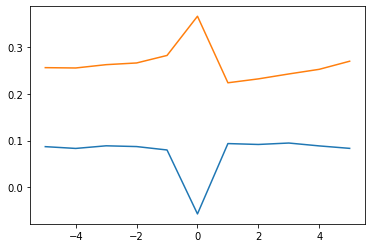

In [1009]:
plt.plot(x,cf_l)
plt.plot(x,cf_h)
#Cashflow Reversal

In [1010]:
ac_dec = ac_dec.transpose()

In [1011]:
ac_dec

acrl_dec,1,10
acrl,-0.164717,0.147967
acrl_lag1,-0.036927,0.017350
acrl_lag2,-0.030441,0.012992
acrl_lag3,-0.025537,0.020979
acrl_lag4,-0.020250,0.021513
acrl_lag5,-0.026934,0.032403
acrl_lead1,-0.041326,0.005977
acrl_lead2,-0.042050,0.005947
acrl_lead3,-0.036343,-0.001704
acrl_lead4,-0.039615,-0.003397


In [1012]:
ac_l = []

In [1013]:
ac_l.append(ac_dec[1][5])
ac_l.append(ac_dec[1][4])
ac_l.append(ac_dec[1][3])
ac_l.append(ac_dec[1][2])
ac_l.append(ac_dec[1][1])
ac_l.append(ac_dec[1][0])
ac_l.append(ac_dec[1][6])
ac_l.append(ac_dec[1][7])
ac_l.append(ac_dec[1][8])
ac_l.append(ac_dec[1][9])
ac_l.append(ac_dec[1][10])

In [1014]:
ac_l

[-0.026934407400077073,
 -0.020250226867159153,
 -0.025537336226047935,
 -0.030440738890080216,
 -0.03692729138933797,
 -0.16471672019768813,
 -0.041326363342746426,
 -0.04204975413562545,
 -0.036343018678360935,
 -0.03961459714096991,
 -0.04466702520608667]

In [1015]:
ac_h = []

In [1016]:
ac_h.append(ac_dec[10][5])
ac_h.append(ac_dec[10][4])
ac_h.append(ac_dec[10][3])
ac_h.append(ac_dec[10][2])
ac_h.append(ac_dec[10][1])
ac_h.append(ac_dec[10][0])
ac_h.append(ac_dec[10][6])
ac_h.append(ac_dec[10][7])
ac_h.append(ac_dec[10][8])
ac_h.append(ac_dec[10][9])
ac_h.append(ac_dec[10][10])

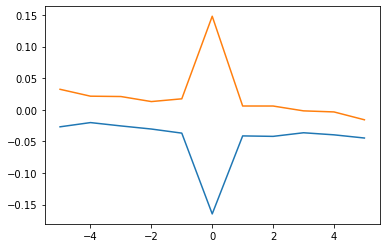

In [1017]:
plt.plot(x,ac_l)
plt.plot(x,ac_h)
#Accrual Reversal

In [1018]:
earn_dec = earn_dec.transpose()

In [1019]:
earn_dec

earn_dec,1,10
earnings,-0.033481,0.323267
earnings_lead1,0.012147,0.285011
earn_lag1,0.019763,0.301358
earn_lag2,0.058503,0.280197
earn_lag3,0.075311,0.271142
earn_lag4,0.087832,0.267185
earn_lag5,0.095690,0.263029
earnings_lead2,0.039007,0.252634
earnings_lead3,0.052768,0.234344
earnings_lead4,0.059220,0.216845


In [1020]:
earn_l = []

In [1021]:
earn_l.append(earn_dec[1][6])
earn_l.append(earn_dec[1][5])
earn_l.append(earn_dec[1][4])
earn_l.append(earn_dec[1][3])
earn_l.append(earn_dec[1][2])
earn_l.append(earn_dec[1][0])
earn_l.append(earn_dec[1][1])
earn_l.append(earn_dec[1][7])
earn_l.append(earn_dec[1][8])
earn_l.append(earn_dec[1][9])
earn_l.append(earn_dec[1][10])

In [1022]:
earn_h = []

In [1023]:
earn_h.append(earn_dec[10][6])
earn_h.append(earn_dec[10][5])
earn_h.append(earn_dec[10][4])
earn_h.append(earn_dec[10][3])
earn_h.append(earn_dec[10][2])
earn_h.append(earn_dec[10][0])
earn_h.append(earn_dec[10][1])
earn_h.append(earn_dec[10][7])
earn_h.append(earn_dec[10][8])
earn_h.append(earn_dec[10][9])
earn_h.append(earn_dec[10][10])

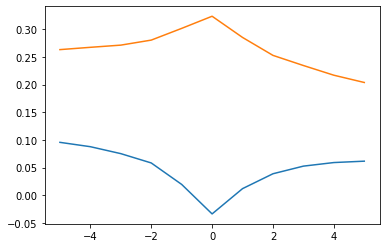

In [1024]:
plt.plot(x,earn_l)
plt.plot(x,earn_h)